# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [1]:
import pandas as pd
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', header = None, names = columns))


In [2]:
fires_dt = fires_dt.drop(0)
fires_dt.head()

,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18,33,0.9,0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0
4,8,6,mar,fri,91.7,33.3,77.5,9,8.3,97,4,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0,0


In [3]:
################################################################
# data treatment
################################################################
import numpy as np
fires_dt_adjusted = fires_dt.copy()

columns = ['coord_x', 'coord_y','ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind','rain','area']

for c in columns:
    fires_dt_adjusted[c] = fires_dt_adjusted[c].apply(lambda x : float(x))


In [4]:
print ("fires_dt.shape" , fires_dt.shape)

print ("fires_dt_adjusted.shape" , fires_dt_adjusted.shape)

fires_dt.shape (517, 13)
fires_dt_adjusted.shape (517, 13)


In [5]:
analysys_df = pd.DataFrame()

analysys_df['varaibles'] = fires_dt.columns
analysys_df['dtype'] = np.array(fires_dt.dtypes)
analysys_df['is_null'] = np.array(fires_dt.isnull().sum())

analysys_df

,varaibles,dtype,is_null
0,coord_x,object,0
1,coord_y,object,0
2,month,object,0
3,day,object,0
4,ffmc,object,0
5,dmc,object,0
6,dc,object,0
7,isi,object,0
8,temp,object,0
9,rh,object,0


In [6]:
# data overview
analysys_df2 = pd.DataFrame()

analysys_df2['varaibles'] = fires_dt_adjusted.columns
analysys_df2['dtype'] = np.array(fires_dt_adjusted.dtypes)
analysys_df2['is_null'] = np.array(fires_dt_adjusted.isnull().sum())

analysys_df2

,varaibles,dtype,is_null
0,coord_x,float64,0
1,coord_y,float64,0
2,month,object,0
3,day,object,0
4,ffmc,float64,0
5,dmc,float64,0
6,dc,float64,0
7,isi,float64,0
8,temp,float64,0
9,rh,float64,0


# Get X and Y

Create the features data frame and target data.

In [7]:
from sklearn.model_selection import train_test_split

# The model objective is to predict the area affected by forest fires given the features set. 
x_df = fires_dt_adjusted.drop (columns=['area'], axis=1)

y_df = fires_dt_adjusted['area']

X_train, X_test, Y_train, Y_test = train_test_split(x_df, y_df, test_size = 0.3, random_state = 42)

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import  cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


In [9]:
# preproc1
num_columns = [ 'coord_x', 'coord_y',  'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
non_num_columns = ['month', 'day']

# numerical Variables
pipe_num_columns = Pipeline([
    ('standardizer', RobustScaler())
])

# NON numerical Variables
pipe_non_num_columns = Pipeline([
   ('standardizer', OneHotEncoder(handle_unknown='infrequent_if_exist') )
])

ctransform_simple = ColumnTransformer([
    ('numeric_simple', pipe_num_columns, num_columns),
    ('non_numeric_simple', pipe_non_num_columns, non_num_columns)]
    , remainder='drop'
    )


### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [10]:
# preproc2
from sklearn.preprocessing import StandardScaler, FunctionTransformer

num_columns = [ 'coord_x', 'coord_y',  'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind']
num_column_rain = ['rain']
non_num_columns = ['month', 'day']

# Custom transformer for non-linear transformation the log
def apply_log(x):
    return np.log1p(x)  # Apply log transformation (log(1 + x))

log_transformer = FunctionTransformer(func=apply_log, validate=False)


# numerical Variables
pipe2_num_columns = Pipeline([
    ('standardizer', StandardScaler())
])

pipe2_num_column_rain = Pipeline([
    ('standardizer', StandardScaler(), num_column_rain),
    ('log_rain', log_transformer, ['rain'] )
])


# NON numerical Variables
pipe2_non_num_columns = Pipeline([
   ('standardizer', OneHotEncoder(handle_unknown='infrequent_if_exist') )
])

ctransform_simple2 = ColumnTransformer([
    ('numeric_simple', pipe2_num_columns, num_columns),
    # ('log_rain' , pipe2_num_column_rain , num_column_rain),
    ('non_numeric_simple', pipe2_non_num_columns, non_num_columns)]
    , remainder='drop'
    )


## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [11]:
# Pipeline A = preproc1 + baseline
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet

pipe_A = Pipeline([
    ('preprocessing', ctransform_simple),
    ('clf', LinearRegression())
])

pipe_A


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric_simple',
                                                  Pipeline(steps=[('standardizer',
                                                                   RobustScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('non_numeric_simple',
                                                  Pipeline(steps=[('standardizer',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  ['month', 'day'])])),
                ('clf', LinearRegression())])

In [12]:
# Pipeline B = preproc2 + baseline

pipe_B = Pipeline([
    ('preprocessing', ctransform_simple2),
    ('clf', LinearRegression())
])

pipe_B

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric_simple',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind']),
                                                 ('non_numeric_simple',
                                                  Pipeline(steps=[('standardizer',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  ['month', 'day'])])),
                ('clf', LinearRegression())])

In [13]:
# Pipeline C = preproc1 + advanced model
from sklearn.ensemble import RandomForestRegressor

pipe_C = Pipeline([
    ('preprocessing', ctransform_simple),
    ('clf', RandomForestRegressor())
])

pipe_C



Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric_simple',
                                                  Pipeline(steps=[('standardizer',
                                                                   RobustScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('non_numeric_simple',
                                                  Pipeline(steps=[('standardizer',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  ['month', 'day'])])),
                ('clf', RandomForestRegressor())])

In [14]:
# Pipeline D = preproc2 + advanced model

pipe_D = Pipeline([
    ('preprocessing', ctransform_simple2),
    ('clf', RandomForestRegressor())
])

pipe_D


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric_simple',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind']),
                                                 ('non_numeric_simple',
                                                  Pipeline(steps=[('standardizer',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  ['month', 'day'])])),
                ('clf', RandomForestRegressor())])

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [15]:
pipe_A.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('numeric_simple',
                                    Pipeline(steps=[('standardizer',
                                                     RobustScaler())]),
                                    ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                     'isi', 'temp', 'rh', 'wind', 'rain']),
                                   ('non_numeric_simple',
                                    Pipeline(steps=[('standardizer',
                                                     OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                    ['month', 'day'])])),
  ('clf', LinearRegression())],
 'verbose': False,
 'preprocessing': ColumnTransformer(transformers=[('numeric_simple',
                                  Pipeline(steps=[('standardizer',
                                                   RobustScaler())]),
                                  ['coord_x', 'coord

In [16]:
# Pipeline A = preproc1 + baseline
from sklearn.model_selection import GridSearchCV

scoring = ['neg_root_mean_squared_error'] #['neg_log_loss', 'accuracy', 'precision', 'recall'] 

# Parfameters for Elastic Net
#    'clf__l1_ratio': [0.01, 0.3, 0.5, 0.7, 0.99],
#    'clf__max_iter': [1000, 2000, 3000]

# Parfameters for Linear Regression
param_grid = {
    'clf__copy_X': [True,False],
    'clf__fit_intercept': [True,False],
}

grid_cv_A = GridSearchCV( # GridSearchCV is a brute force approach for testing all param_grid combinations
    estimator  = pipe_A, 
    param_grid = param_grid, 
    scoring    = scoring, 
    cv         = 5,
    refit = "neg_root_mean_squared_error",
    return_train_score=True) 

grid_cv_A.fit(X_train , Y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric_simple',
                                                                         Pipeline(steps=[('standardizer',
                                                                                          RobustScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('non_numeric_simple',
                                                                         Pipeline(steps=[('standardizer',
                                                                                          OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('clf', LinearRegression())]),
             param_grid={'clf__copy_X': [True, False],
                         'clf__fit_intercept': [True, False]},
             refit='neg_root_mean_squared_error', return_train_score=True,
             scoring=['neg_root_mean_squared_error'])

In [17]:
pd.DataFrame(grid_cv_A.cv_results_).sort_values('rank_test_neg_root_mean_squared_error')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__copy_X,param_clf__fit_intercept,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,...,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_train_neg_root_mean_squared_error,split1_train_neg_root_mean_squared_error,split2_train_neg_root_mean_squared_error,split3_train_neg_root_mean_squared_error,split4_train_neg_root_mean_squared_error,mean_train_neg_root_mean_squared_error,std_train_neg_root_mean_squared_error
0,0.013441,0.006660,0.006479,0.005382,True,True,"{'clf__copy_X': True, 'clf__fit_intercept': True}",-44.160022,-26.247083,-31.031591,...,-43.966592,24.261029,1,-48.210735,-51.180599,-51.307089,-28.322627,-51.036514,-46.011513,8.919041
2,0.014118,0.007259,0.003275,0.003676,False,True,"{'clf__copy_X': False, 'clf__fit_intercept': T...",-44.160022,-26.247083,-31.031591,...,-43.966592,24.261029,1,-48.210735,-51.180599,-51.307089,-28.322627,-51.036514,-46.011513,8.919041
1,0.012016,0.005251,0.005685,0.004970,True,False,"{'clf__copy_X': True, 'clf__fit_intercept': Fa...",-44.160022,-26.247083,-31.031591,...,-43.967334,24.252766,3,-48.210735,-51.180599,-51.307089,-28.322627,-51.036514,-46.011513,8.919041
3,0.013004,0.006934,0.001847,0.002285,False,False,"{'clf__copy_X': False, 'clf__fit_intercept': F...",-44.160022,-26.247083,-31.031591,...,-43.967334,24.252766,3,-48.210735,-51.180599,-51.307089,-28.322627,-51.036514,-46.011513,8.919041


In [18]:
pipe_B.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('numeric_simple',
                                    Pipeline(steps=[('standardizer',
                                                     StandardScaler())]),
                                    ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                     'isi', 'temp', 'rh', 'wind']),
                                   ('non_numeric_simple',
                                    Pipeline(steps=[('standardizer',
                                                     OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                    ['month', 'day'])])),
  ('clf', LinearRegression())],
 'verbose': False,
 'preprocessing': ColumnTransformer(transformers=[('numeric_simple',
                                  Pipeline(steps=[('standardizer',
                                                   StandardScaler())]),
                                  ['coord_x', 'coord_y',

In [19]:
# Evaluate baseline model
# Pipeline B = preproc2 + baseline
from sklearn.model_selection import GridSearchCV

scoring = ['neg_root_mean_squared_error']

# Parfameters for Elastic Net
#    'clf__l1_ratio': [0.01, 0.3, 0.5, 0.7, 0.99],
#    'clf__max_iter': [1000, 2000, 3000]

# Parfameters for Linear Regression
param_grid = {
    'clf__copy_X': [True,False],
    'clf__fit_intercept': [True,False],
}


grid_cv_B = GridSearchCV( # GridSearchCV is a brute force approach for testing all param_grid combinations
    estimator  = pipe_B, 
    param_grid = param_grid, 
    scoring    = scoring, 
    cv         = 5,
    refit = "neg_root_mean_squared_error",
    return_train_score=True) # once you finish testing all, reutrn the best model according to Log Loss

grid_cv_B.fit(X_train , Y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric_simple',
                                                                         Pipeline(steps=[('standardizer',
                                                                                          StandardScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind']),
                                                                        ('non_numeric_simple',
                                                                         Pipeline(steps=[('standardizer',
                                                                                          OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('clf', LinearRegression())]),
             param_grid={'clf__copy_X': [True, False],
                         'clf__fit_intercept': [True, False]},
             refit='neg_root_mean_squared_error', return_train_score=True,
             scoring=['neg_root_mean_squared_error'])

In [20]:
pd.DataFrame(grid_cv_B.cv_results_).sort_values('rank_test_neg_root_mean_squared_error')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__copy_X,param_clf__fit_intercept,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,...,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_train_neg_root_mean_squared_error,split1_train_neg_root_mean_squared_error,split2_train_neg_root_mean_squared_error,split3_train_neg_root_mean_squared_error,split4_train_neg_root_mean_squared_error,mean_train_neg_root_mean_squared_error,std_train_neg_root_mean_squared_error
1,0.034423,0.025885,0.007349,0.006024,True,False,"{'clf__copy_X': True, 'clf__fit_intercept': Fa...",-44.069225,-26.20301,-25.74449,...,-42.873501,24.925527,1,-48.23696,-51.198203,-51.341169,-28.324976,-51.051219,-46.030506,8.92715
3,0.013621,0.004098,0.005982,0.001850,False,False,"{'clf__copy_X': False, 'clf__fit_intercept': F...",-44.069225,-26.20301,-25.74449,...,-42.873501,24.925527,1,-48.23696,-51.198203,-51.341169,-28.324976,-51.051219,-46.030506,8.92715
0,0.014058,0.000753,0.006969,0.002017,True,True,"{'clf__copy_X': True, 'clf__fit_intercept': True}",-44.069225,-26.20301,-25.74449,...,-42.879388,24.922589,3,-48.23696,-51.198203,-51.341169,-28.324976,-51.051219,-46.030506,8.92715
2,0.026930,0.020797,0.013586,0.009561,False,True,"{'clf__copy_X': False, 'clf__fit_intercept': T...",-44.069225,-26.20301,-25.74449,...,-42.879388,24.922589,3,-48.23696,-51.198203,-51.341169,-28.324976,-51.051219,-46.030506,8.92715


In [21]:
pipe_C.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('numeric_simple',
                                    Pipeline(steps=[('standardizer',
                                                     RobustScaler())]),
                                    ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                     'isi', 'temp', 'rh', 'wind', 'rain']),
                                   ('non_numeric_simple',
                                    Pipeline(steps=[('standardizer',
                                                     OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                    ['month', 'day'])])),
  ('clf', RandomForestRegressor())],
 'verbose': False,
 'preprocessing': ColumnTransformer(transformers=[('numeric_simple',
                                  Pipeline(steps=[('standardizer',
                                                   RobustScaler())]),
                                  ['coord_x', '

In [22]:
# Pipeline C = preproc1 + advanced model

scoring = ['neg_log_loss'] # ['neg_log_loss', 'accuracy', 'precision', 'recall'] 

param_grid = {
    'clf__bootstrap': [True , False],
    'clf__max_depth': [1,5,10,15],
    'clf__n_estimators': [100,200,300,400,500]
    }

grid_cv_C = GridSearchCV( # GridSearchCV is a brute force approach for testing all param_grid combinations
    estimator  = pipe_C, 
    param_grid = param_grid, 
    # scoring    = scoring, 
    cv         = 5,
    # refit = "neg_log_loss",
    return_train_score=True) # once you finish testing all, reutrn the best model according to Log Loss

grid_cv_C.fit(X_train , Y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric_simple',
                                                                         Pipeline(steps=[('standardizer',
                                                                                          RobustScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('non_numeric_simple',
                                                                         Pipeline(steps=[('standardizer',
                                                                                          OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('clf', RandomForestRegressor())]),
             param_grid={'clf__bootstrap': [True, False],
                         'clf__max_depth': [1, 5, 10, 15],
                         'clf__n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True)

In [23]:
pd.DataFrame(grid_cv_C.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__bootstrap,param_clf__max_depth,param_clf__n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.219226,0.014408,0.012180,0.006218,True,1,200,"{'clf__bootstrap': True, 'clf__max_depth': 1, ...",-0.206212,-0.044493,...,-0.109059,0.088502,1,0.072383,0.049748,0.064306,0.056057,0.045812,0.057661,0.009659
2,0.332339,0.021896,0.020300,0.006955,True,1,300,"{'clf__bootstrap': True, 'clf__max_depth': 1, ...",-0.184237,-0.045447,...,-0.109132,0.086299,2,0.071531,0.051987,0.064797,0.056160,0.048327,0.058560,0.008495
4,0.527829,0.030436,0.030424,0.003916,True,1,500,"{'clf__bootstrap': True, 'clf__max_depth': 1, ...",-0.190554,-0.051163,...,-0.109321,0.084594,3,0.068907,0.051468,0.064914,0.056296,0.048277,0.057972,0.007834
3,0.588284,0.119395,0.025440,0.007740,True,1,400,"{'clf__bootstrap': True, 'clf__max_depth': 1, ...",-0.200040,-0.053014,...,-0.110746,0.086849,4,0.070888,0.050493,0.064605,0.055973,0.047468,0.057885,0.008730
0,0.132715,0.018080,0.011017,0.002873,True,1,100,"{'clf__bootstrap': True, 'clf__max_depth': 1, ...",-0.233405,-0.053671,...,-0.122511,0.095911,5,0.066653,0.049411,0.063589,0.055890,0.046787,0.056466,0.007724
23,0.310109,0.009027,0.020663,0.005505,False,1,400,"{'clf__bootstrap': False, 'clf__max_depth': 1,...",-0.243272,-0.003501,...,-0.122665,0.128918,6,0.054584,0.030693,0.041108,0.032714,0.030530,0.037926,0.009185
24,0.413570,0.032473,0.023668,0.006278,False,1,500,"{'clf__bootstrap': False, 'clf__max_depth': 1,...",-0.243272,-0.003501,...,-0.122665,0.128918,7,0.054584,0.030693,0.041108,0.032714,0.030530,0.037926,0.009185
22,0.244484,0.011581,0.014490,0.005090,False,1,300,"{'clf__bootstrap': False, 'clf__max_depth': 1,...",-0.243272,-0.003501,...,-0.122665,0.128918,8,0.054584,0.030693,0.041108,0.032714,0.030530,0.037926,0.009185
21,0.170250,0.011426,0.010093,0.006848,False,1,200,"{'clf__bootstrap': False, 'clf__max_depth': 1,...",-0.243272,-0.003501,...,-0.122665,0.128918,9,0.054584,0.030693,0.041108,0.032714,0.030530,0.037926,0.009185
20,0.084391,0.005680,0.009082,0.006569,False,1,100,"{'clf__bootstrap': False, 'clf__max_depth': 1,...",-0.243272,-0.003501,...,-0.122665,0.128918,10,0.054584,0.030693,0.041108,0.032714,0.030530,0.037926,0.009185


In [24]:
# Pipeline D = preproc2 + advanced model
scoring = ['neg_log_loss'] # ['neg_log_loss', 'accuracy', 'precision', 'recall'] 

param_grid = {
    'clf__bootstrap': [True , False],
    'clf__max_depth': [1,5,10,15],
    'clf__n_estimators': [100,200,300,400,500]
    }

grid_cv_D = GridSearchCV( # GridSearchCV is a brute force approach for testing all param_grid combinations
    estimator  = pipe_D, 
    param_grid = param_grid, 
    # scoring    = scoring, 
    cv         = 5,
    # refit = "neg_log_loss",
    return_train_score=True) # once you finish testing all, reutrn the best model according to Log Loss

grid_cv_D.fit(X_train , Y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric_simple',
                                                                         Pipeline(steps=[('standardizer',
                                                                                          StandardScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind']),
                                                                        ('non_numeric_simple',
                                                                         Pipeline(steps=[('standardizer',
                                                                                          OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('clf', RandomForestRegressor())]),
             param_grid={'clf__bootstrap': [True, False],
                         'clf__max_depth': [1, 5, 10, 15],
                         'clf__n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True)

In [25]:
pd.DataFrame(grid_cv_D.cv_results_).sort_values('rank_test_score')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__bootstrap,param_clf__max_depth,param_clf__n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
3,0.494167,0.016074,0.026006,0.007551,True,1,400,"{'clf__bootstrap': True, 'clf__max_depth': 1, ...",-0.154665,-0.043842,...,-0.095360,0.074809,1,0.068900,0.049113,0.062749,0.056209,0.048979,0.057190,0.007767
0,0.122664,0.005425,0.013993,0.003884,True,1,100,"{'clf__bootstrap': True, 'clf__max_depth': 1, ...",-0.176342,-0.057607,...,-0.103280,0.077225,2,0.069630,0.047223,0.063486,0.055214,0.050154,0.057141,0.008332
1,0.319198,0.094788,0.018101,0.010657,True,1,200,"{'clf__bootstrap': True, 'clf__max_depth': 1, ...",-0.190389,-0.032771,...,-0.109610,0.088805,3,0.069690,0.047193,0.063139,0.058253,0.053171,0.058289,0.007782
2,0.450561,0.047063,0.023211,0.005086,True,1,300,"{'clf__bootstrap': True, 'clf__max_depth': 1, ...",-0.227624,-0.035993,...,-0.111432,0.089219,4,0.067701,0.050710,0.063302,0.057247,0.050482,0.057888,0.006817
4,0.588340,0.017993,0.018456,0.005489,True,1,500,"{'clf__bootstrap': True, 'clf__max_depth': 1, ...",-0.186708,-0.034657,...,-0.113168,0.091828,5,0.070151,0.050461,0.065939,0.056947,0.051213,0.058942,0.007877
23,0.334483,0.011609,0.020223,0.005374,False,1,400,"{'clf__bootstrap': False, 'clf__max_depth': 1,...",-0.243272,-0.003501,...,-0.122665,0.128918,6,0.054584,0.030693,0.041108,0.032714,0.030530,0.037926,0.009185
24,0.415226,0.011873,0.019101,0.004838,False,1,500,"{'clf__bootstrap': False, 'clf__max_depth': 1,...",-0.243272,-0.003501,...,-0.122665,0.128918,7,0.054584,0.030693,0.041108,0.032714,0.030530,0.037926,0.009185
22,0.278869,0.026595,0.020194,0.005680,False,1,300,"{'clf__bootstrap': False, 'clf__max_depth': 1,...",-0.243272,-0.003501,...,-0.122665,0.128918,8,0.054584,0.030693,0.041108,0.032714,0.030530,0.037926,0.009185
21,0.247715,0.029595,0.019971,0.003763,False,1,200,"{'clf__bootstrap': False, 'clf__max_depth': 1,...",-0.243272,-0.003501,...,-0.122665,0.128918,9,0.054584,0.030693,0.041108,0.032714,0.030530,0.037926,0.009185
20,0.099069,0.010499,0.010924,0.005834,False,1,100,"{'clf__bootstrap': False, 'clf__max_depth': 1,...",-0.243272,-0.003501,...,-0.122665,0.128918,10,0.054584,0.030693,0.041108,0.032714,0.030530,0.037926,0.009185


# Evaluate

- Pipe_A
    - Linear Regression -> mean_train_neg_root_mean_squared_error: -46.011513

- Pipe_B
    - Linear Regression -> mean_train_neg_root_mean_squared_error: -46.030506

- Pipe_C
    - Random Forest Regressor -> mean_train_score: 0.057558

- Pipe_D
    - Random Forest Regressor -> mean_train_score: 0.057673

- Between linear regression models, Pipe_A has a better result, and between the random forest models, the Pipe_C has a better result.

# Export

+ Save the best performing model to a pickle file.

In [26]:
# Save the best performing model

import pickle

best_A = grid_cv_A.best_estimator_
best_B = grid_cv_B.best_estimator_
best_C = grid_cv_C.best_estimator_
best_D = grid_cv_D.best_estimator_

with open('./grid_cv_A_best_estimator.pkl', 'wb') as file:
    pickle.dump(best_A, file)

with open('./grid_cv_B_best_estimator.pkl', 'wb') as file:
    pickle.dump(best_B, file)

with open('./grid_cv_C_best_estimator.pkl', 'wb') as file:
    pickle.dump(best_C, file)

with open('./grid_cv_D_best_estimator.pkl', 'wb') as file:
    pickle.dump(best_D, file)



# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

In [27]:
import shap
pipe_A.fit(X_train,Y_train)

data_transform = pipe_A.named_steps['preprocessing'].transform(X_test)

explainer = shap.explainers.Linear(
    pipe_A.named_steps['clf'], 
    data_transform,
    feature_names = pipe_A.named_steps['preprocessing'].get_feature_names_out())

shap_values = explainer(data_transform)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


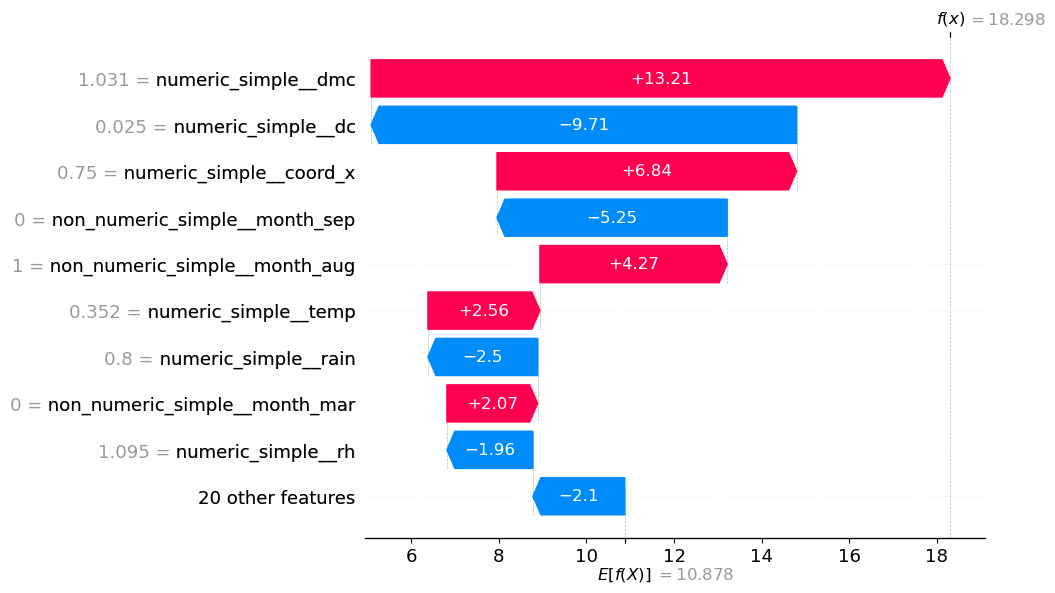

In [28]:
shap.plots.waterfall(shap_values[1])

# Graphic Analysis

### Canadian Forest Fire Weather Index (FWI) System

- numeric_simple_dmc (DMC): It represents the moisture content of loosely compacted, decomposing organic matter underneath the litter. It provides insight into fuel conditions.
    - more fuel increases (positive relation) the area of the fire
    
- numeric_simple_dc (DC): is a numerical rating that represents the average moisture content of deep, compact organic layers in forest ecosystems. It provides insight into seasonal drought effects on forest fuels.
    - more moist means more humidity and reduces (negataive relation) the area of the fire

- non_numeric_simple_month_aug
    - from Montesinho Natural Park (https://www.beportugal.com/montesinho/) "August is the driest and hottest month, while December and January are the wettest and coldest months"
    - less rain increases (positive relation) the chances and area of the fires

- non_numeric_simple_month_sep
    - It was a surprise Septembre have a negative relation with the area of the fires giving it is so close to August (the driest month).
    - This will require furthur investigation.

- numeric_simple_temp
    - higher (positive relation) the temperature higher the area of the fire

- numeric_simple_rain
    - more rain reduces (negative relation) the area of the fire, but he humidity in the soil have a much stronger effect than just rain

- non_numeric_simple_month_mar:
    - It was a surprise March have a positive relation with the area of the fires giving it is so close to December/January (the wettest month).
    - This will require furthur investigation.

- numeric_simple_rh (RH): relative humidity in the air
    - more humidity reduces (negative relation) the area of the fire 

In [29]:
import shap

pipe_C.fit(X_train,Y_train)

data_transform_tree = pipe_C.named_steps['preprocessing'].transform(X_test)

explainer = shap.explainers.TreeExplainer(
    pipe_C.named_steps['clf'], 
    data_transform_tree,
    check_additivity=False,
    feature_names = pipe_C.named_steps['preprocessing'].get_feature_names_out())

shap_values_tree = explainer(data_transform, check_additivity=False)

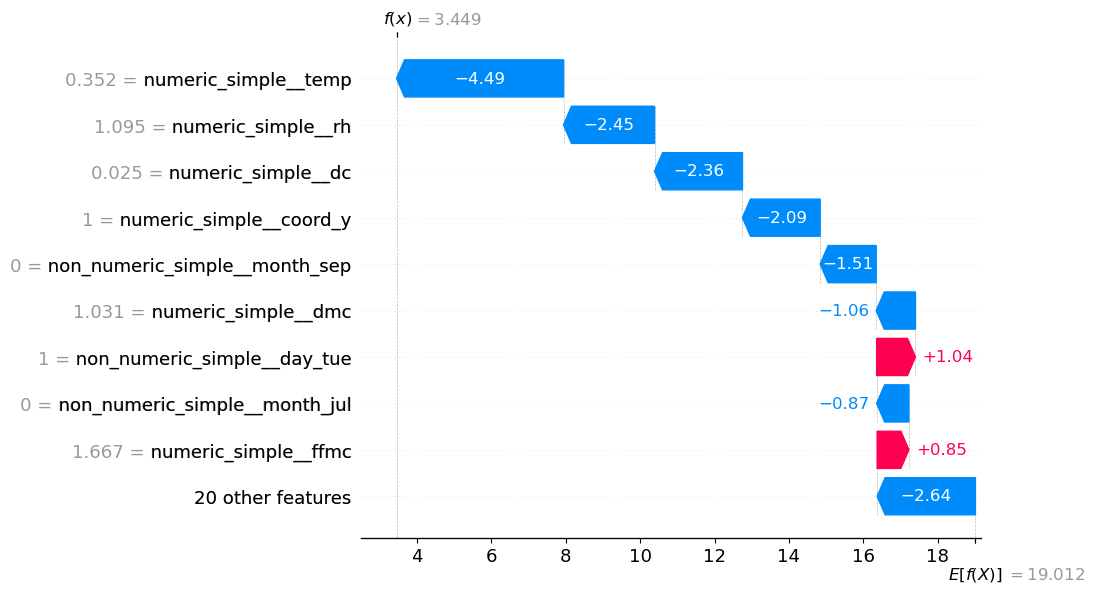

In [30]:
shap.plots.waterfall(shap_values_tree[1])

In [31]:
import pandas as pd

feature_names = pipe_C[:-1].get_feature_names_out()

mdi_importances = pd.Series(
    pipe_C[-1].feature_importances_, index=feature_names
).sort_values(ascending=True)


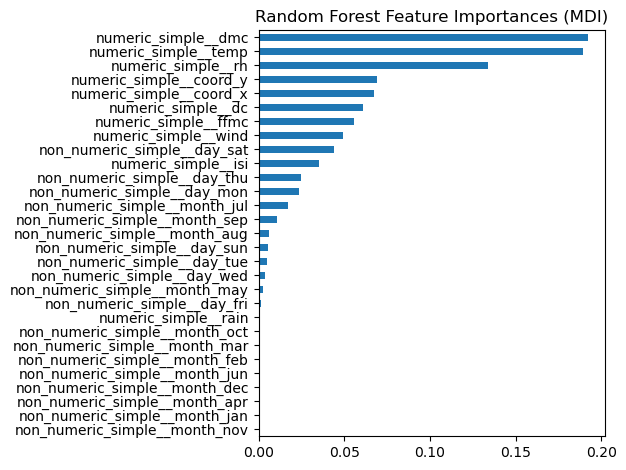

In [32]:
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `23:59 PM - 07/07/2024`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [X] Created a branch with the correct naming convention.
- [X] Ensured that the repository is public.
- [X] Reviewed the PR description guidelines and adhered to them.
- [X] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.